# Поиск частых наборов

### Постановка задачи
1. Реализовать алгоритм Apriori для поиска частых наборов элементов в заданном наборе данных.
2. Провести эксперименты с разными порогами поддержки (например: 1%, 3%, 5%, 10%, 15%).
3. Визуализировать результаты в виде двух диаграмм:  
    * Сравнение времени выполнения при изменении порога поддержки.  
    * Количество частых наборов элементов различной длины при изменении порога поддержки.  
4. Подготовить отчёт

Импорт необходимых библиотек для выполнения поставленных задач

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import time
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных из датасета

In [5]:
data = pd.read_csv('baskets.csv', header=None)

transactions = []
for i in range(len(data)):
    transaction = [item for item in data.iloc[i] if pd.notna(item)]
    transactions.append(transaction)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

Объявим функцию, реализующую метод Априори.  
Она имеет практически ту же сигнатуру, что и метод, принимает непосредственно данные и значение минимальной поддержки.  
Результатом этой функции выступает кортеж из результата метода Априори и времени его выполнения.

In [7]:
def run_apriori(df, min_support, sort_method='support'):
    start_time = time.time()
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    end_time = time.time()

    if sort_method == 'support':
        frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    elif sort_method == 'lexicographic':
        frequent_itemsets['itemsets_str'] = frequent_itemsets['itemsets'].apply(lambda x: str(sorted(list(x))))
        frequent_itemsets = frequent_itemsets.sort_values(by='itemsets_str')
        frequent_itemsets = frequent_itemsets.drop('itemsets_str', axis=1)
    
    return frequent_itemsets, end_time - start_time

Далее выполним требуемые действия и сравним производительность в зависимости от различных порогов поддержки. А также сформируем датафрейм для отображения количества частых наборов.

In [12]:
support_thresholds = [0.01, 0.03, 0.05, 0.1, 0.15]
results = []
execution_times = []

for threshold in support_thresholds:
    freq_items, exec_time = run_apriori(df, threshold, sort_method='lexicographic')
    results.append(freq_items)
    execution_times.append(exec_time)

itemset_counts = []
for res in results:
    counts = res['itemsets'].apply(lambda x: len(x)).value_counts().sort_index()
    itemset_counts.append(counts)

Отобразим полученные результаты.

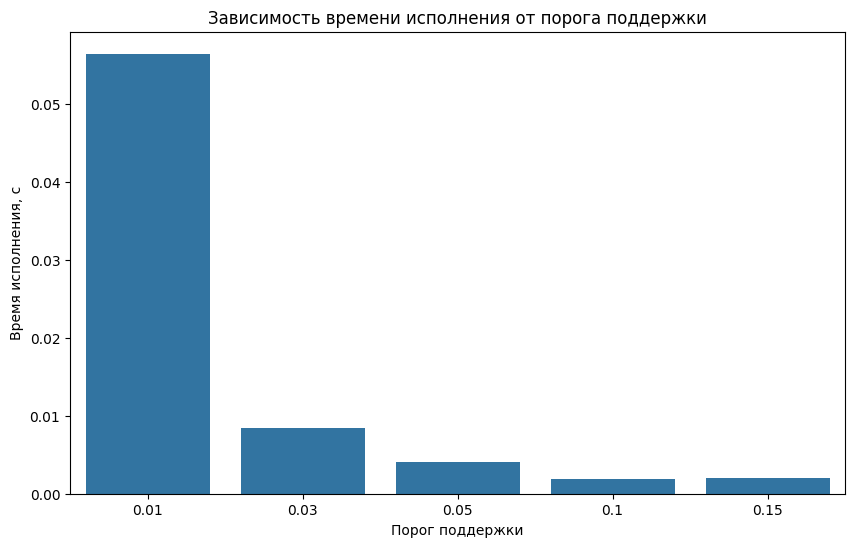

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=support_thresholds, y=execution_times)
plt.xlabel('Порог поддержки')
plt.ylabel('Время исполнения, с')
plt.title('Зависимость времени исполнения от порога поддержки')
plt.show()

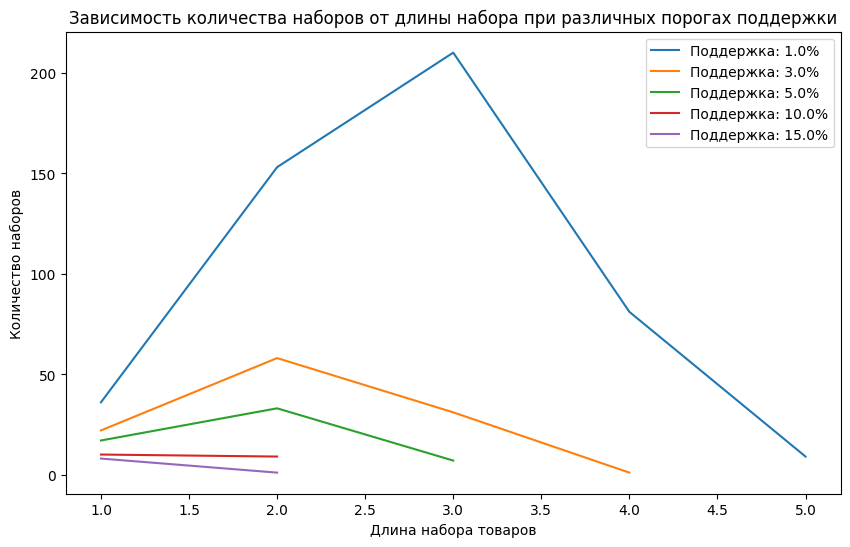

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, counts in enumerate(itemset_counts):
    ax.plot(counts.index, counts.values, label=f'Поддержка: {support_thresholds[i]*100}%')

ax.set_xlabel('Длина набора товаров')
ax.set_ylabel('Количество наборов')
ax.set_title('Зависимость количества наборов от длины набора при различных порогах поддержки')
ax.legend()
plt.show()

### Выводы
* По мере увеличения порога поддержки количество кандидатов уменьшается, вследствие чего время выполнения становится меньше, то есть выполняется быстрее.
* При низком пороге поддержки количество наборов больше, ососбенно имеющих большую длину, т.к. критерии менее строгие. При увелечиении количества порога поддержки помимо уменьшения количества наборов, наблюдается сильное сокращение максимальной длины набора, т.к. критерии подбора становятся более строгими.